# Diabetes Regression Using Random Forest

### Import All Required Libraries

In [78]:
# For numerical operations and working with arrays
import numpy as np

# For working with data in tabular format (like spreadsheets)
import pandas as pd

# For creating static, animated, and interactive plots
import matplotlib.pyplot as plt

# For advanced data visualization (like heatmaps, pair plots, etc.)
import seaborn as sns

# To load the built-in diabetes dataset from scikit-learn
from sklearn.datasets import load_diabetes

# To split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Random Forest Regressor model from scikit-learn's ensemble methods
from sklearn.ensemble import RandomForestRegressor

# To evaluate the model's performance using Mean Squared Error
from sklearn.metrics import mean_squared_error

# To evaluate the model using the R² (coefficient of determination) score
from sklearn.metrics import r2_score


## Load and Explore the Diabetes Dataset 

In [79]:
# Load the diabetes dataset from sklearn
from sklearn.datasets import load_diabetes

# Load it into a variable
diabetes = load_diabetes()

# Convert features (X) into a DataFrame for easier viewing
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Convert the target values (y) into a Series
y = pd.Series(diabetes.target, name='target')
#  Combine features and target into one DataFrame for easier analysis
df = pd.concat([X, y], axis=1)

## Basic Dataset Information

In [80]:
#  Display the first 5 rows of the complete dataset
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [81]:
#  Display the last 5 rows of the complete dataset
df.tail()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [82]:
# Display the shape of the dataset (rows × columns)
# Should be 442 rows and 11 columns (10 features + 1 target)
df.shape


(442, 11)

In [83]:
# Show general information about the dataset (data types, non-null counts)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [84]:
# Display basic statistics for each column (mean, std, min, max, etc.)
df.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [85]:
#  Check for missing values
# Returns count of nulls in each column
df.isnull().sum()


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [86]:
# Check for any duplicate rows (not expected in this dataset, but a good habit)
df.duplicated().sum()


np.int64(0)

## Explore and Visualize the Diabetes Dataset

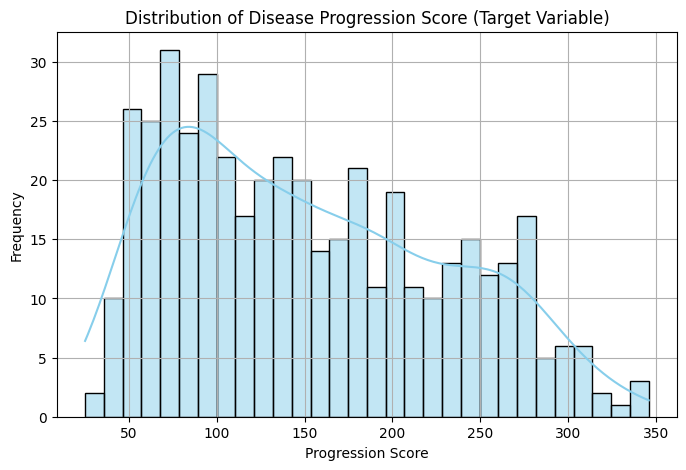

In [87]:
#  Plot the distribution of the target variable (disease progression score)
plt.figure(figsize=(8, 5))
sns.histplot(df['target'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Disease Progression Score (Target Variable)')
plt.xlabel('Progression Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


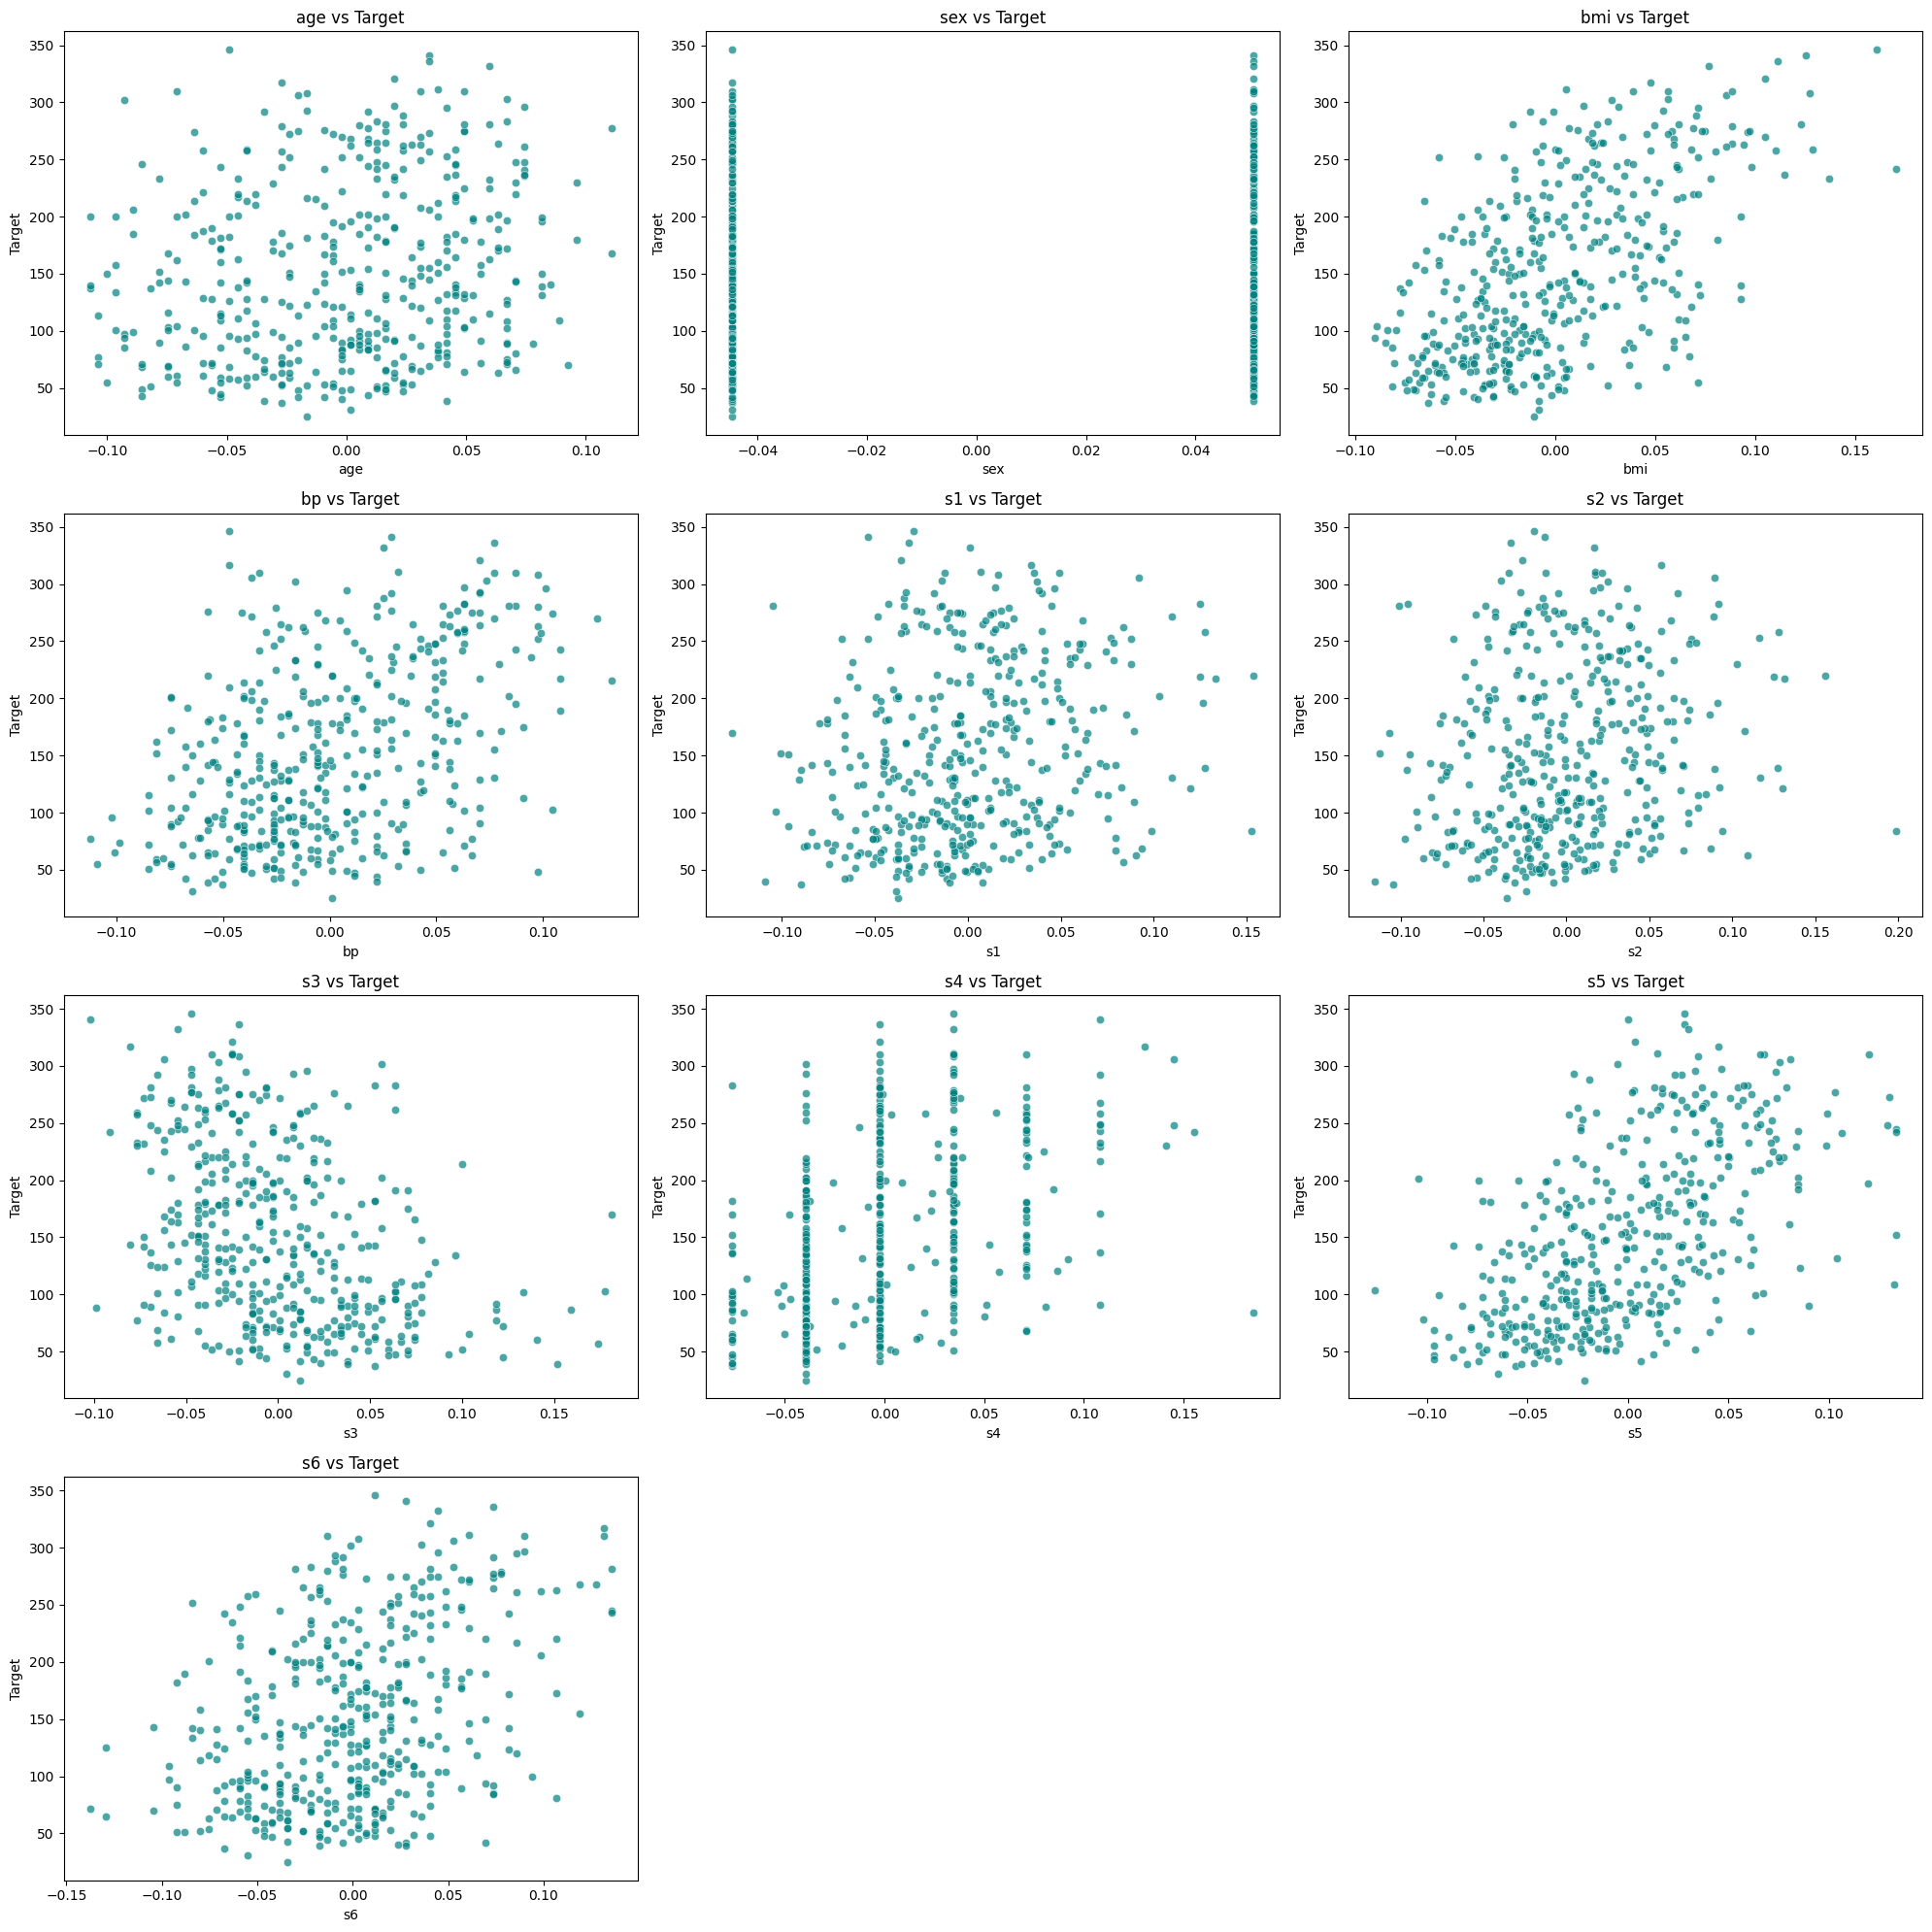

In [88]:
# Plot scatter plots for each feature vs target
# Helps identify linear or non-linear patterns

feature_cols = df.columns[:-1]  # all columns except 'target'

# Create subplots
plt.figure(figsize=(20, 20))
for i, col in enumerate(feature_cols):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['target'], alpha=0.7, color='teal')
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Target')

plt.tight_layout()
plt.show()


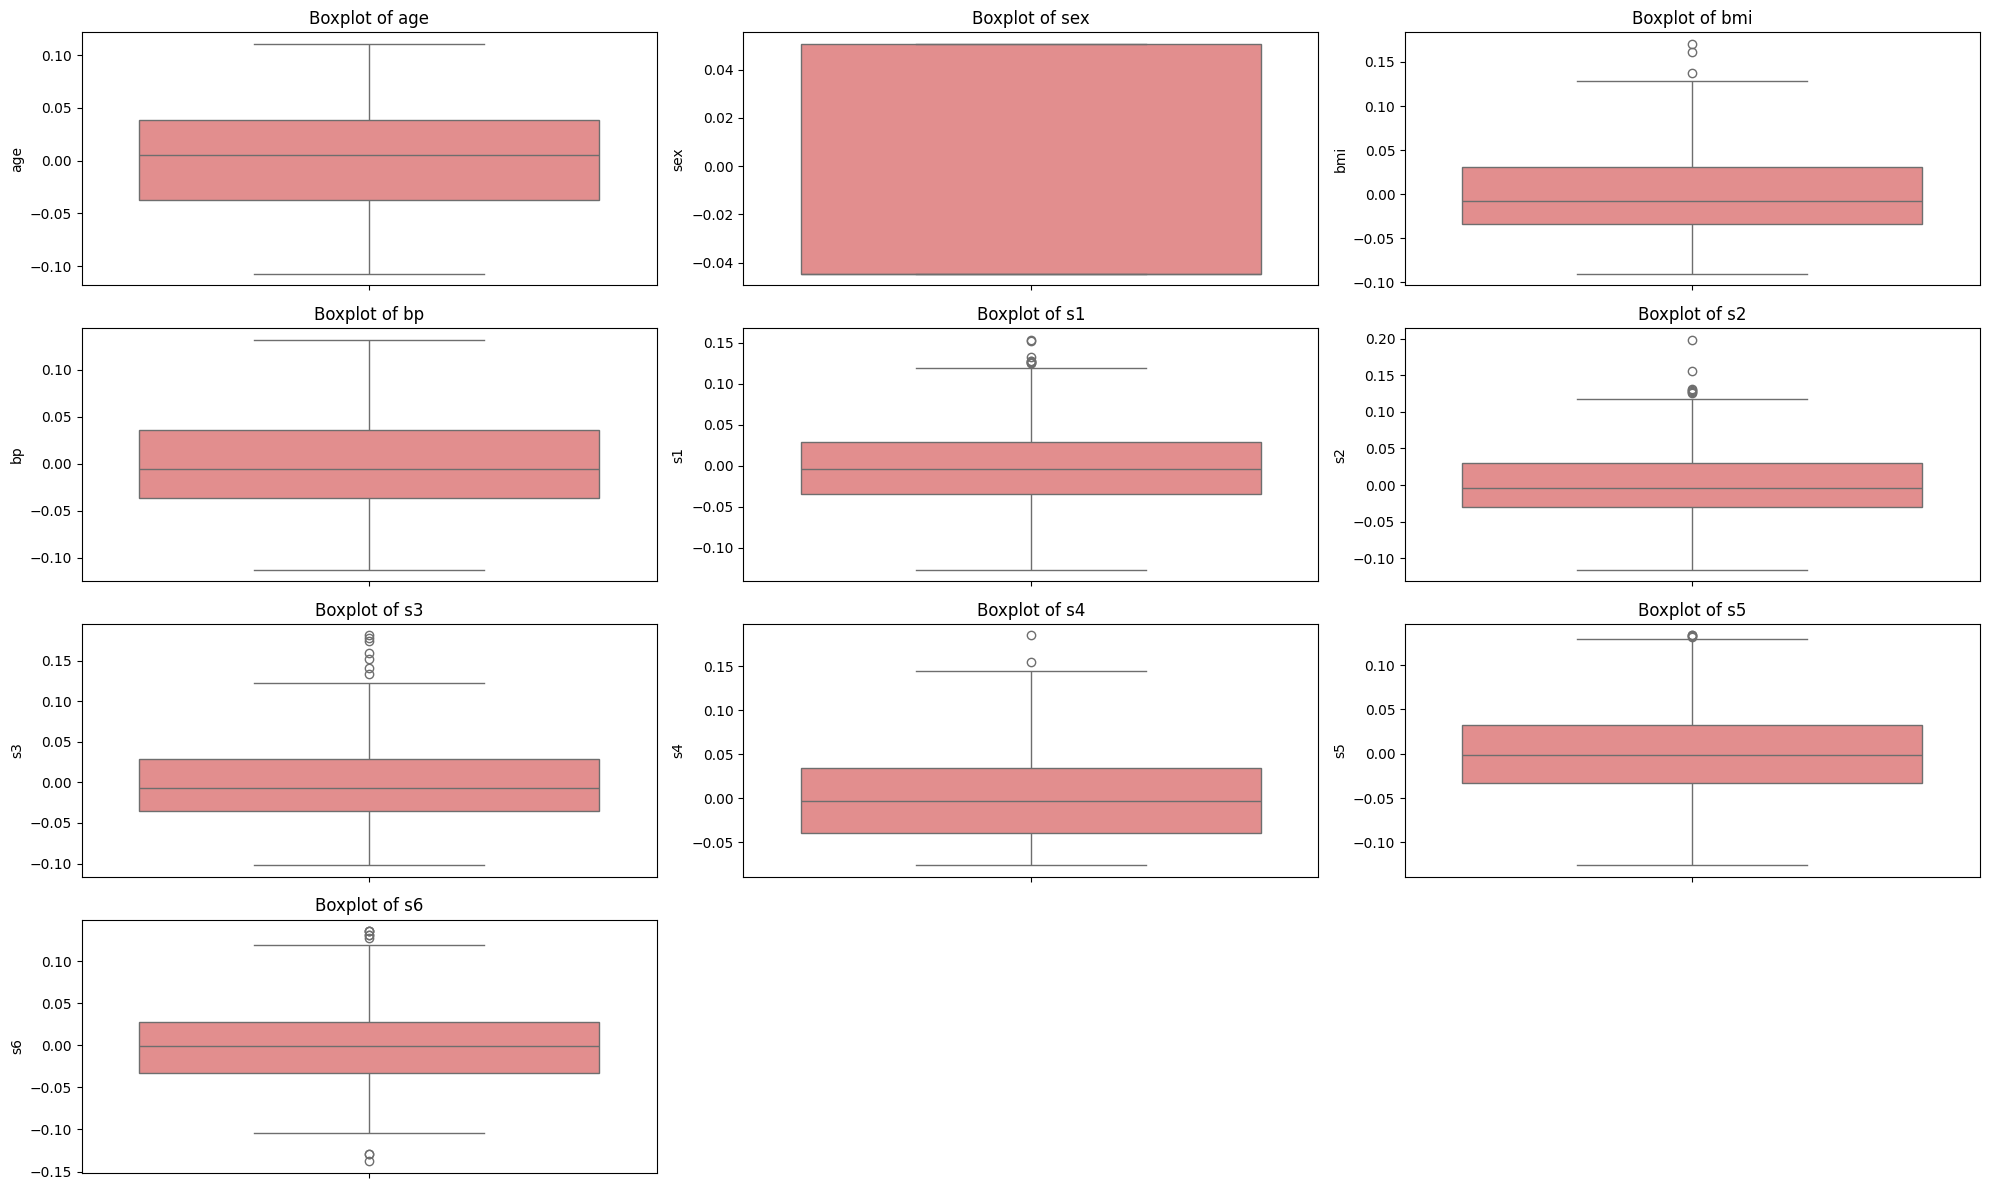

In [89]:
#  Boxplots for each feature to visually inspect outliers
plt.figure(figsize=(20, 12))
for i, col in enumerate(feature_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


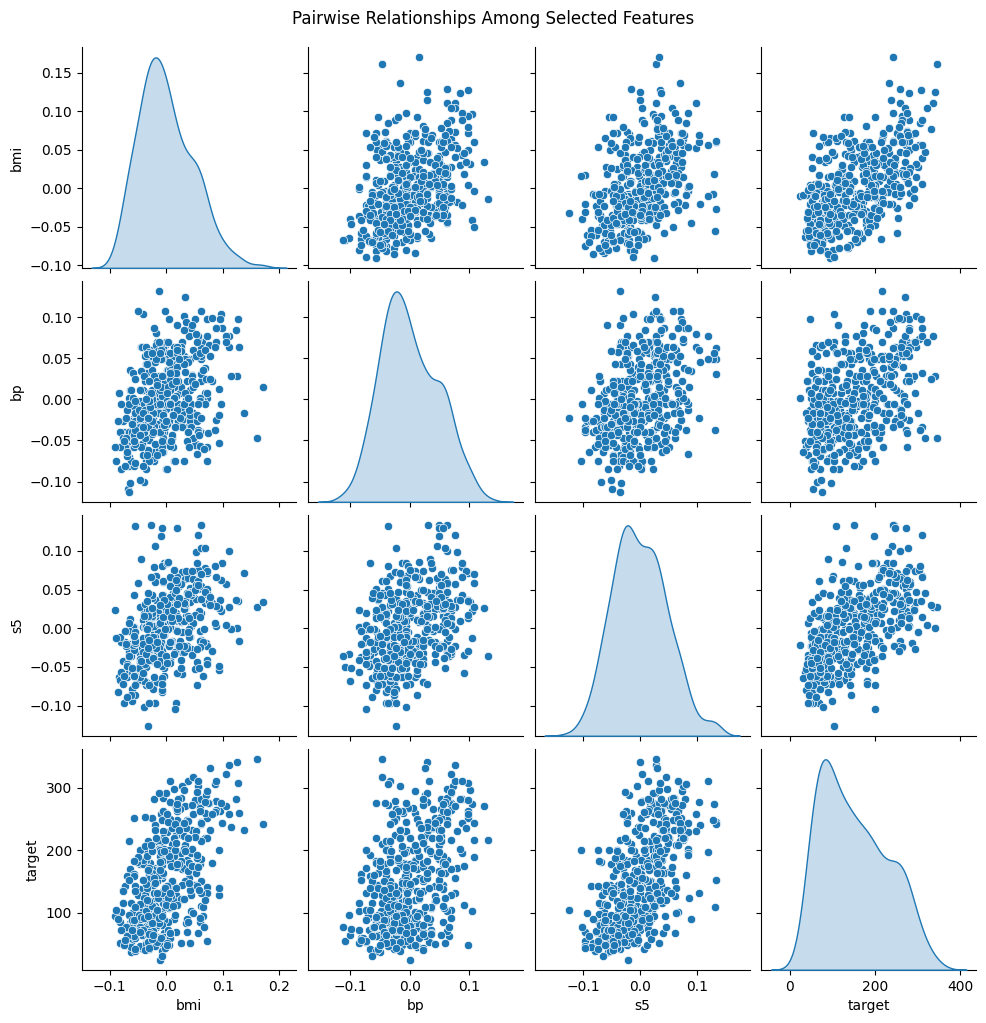

In [90]:
#  Use seaborn’s pairplot to visualize a few key relationships
# (limit to 4 features for performance)
sns.pairplot(df[['bmi', 'bp', 's5', 'target']], diag_kind='kde', kind='scatter')
plt.suptitle("Pairwise Relationships Among Selected Features", y=1.02)
plt.show()


## Splitting the Dataset and Training the Model

In [91]:
#   Prepare input features (X) and target variable (y)
# We separate the dataset into features and target
X = df.drop('target', axis=1)  # X contains all the feature columns
y = df['target']               # y contains the target column (disease progression)

#  Split the data into training and testing sets
# test_size=0.2 means 20% of data will be used for testing and 80% for training
# random_state=42 ensures that the split is reproducible every time
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Show the shape of each subset
# This helps confirm how many samples are in the training and test sets
print(" Dataset Split Results:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

#   Initialize the Random Forest Regressor model
# n_estimators=100 means the forest will use 100 decision trees
# n_jobs=-1 allows the model to use all CPU cores for faster computation
# random_state=42 ensures consistent results on repeated runs
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

#  Train the model using the training data
# The model learns patterns in the training data to predict the target variable
rf_model.fit(X_train, y_train)

#  Indicate that the model has been successfully trained
print(" Random Forest Regressor training completed.")


 Dataset Split Results:
X_train shape: (353, 10)
X_test shape:  (89, 10)
y_train shape: (353,)
y_test shape:  (89,)
 Random Forest Regressor training completed.


## Make Predictions and Evaluate the Model's Performance

In [ ]:
# Assuming you have already trained the model and have your test data split

#  Make predictions on the test set using the trained Random Forest model
# y_pred contains the predicted diabetes progression values for the test set
y_pred = rf_model.predict(X_test)

#  Display the predicted values
# You can display the predictions alongside the actual values (y_test) for comparison
predicted_vs_actual = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred
})

print(predicted_vs_actual.head())  # Display the first few predicted vs actual values for comparison

#  Visualize the predicted values vs actual values in a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.xlabel("Actual Values (Disease Progression)")  # X-axis: Actual target values
plt.ylabel("Predicted Values (Disease Progression)")  # Y-axis: Predicted target values
plt.title(" Actual vs Predicted Diabetes Progression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect prediction line
plt.grid(True)
plt.show()

#  Calculate evaluation metrics for the predictions
# These metrics help us assess the model's prediction performance on the test data

mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error (MSE)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)  # R-squared (R²) Score

#  Display the evaluation metrics
print(" Model Evaluation Metrics on Test Data:")
print(f"Mean Absolute Error (MAE):      {mae:.2f}")
print(f"Mean Squared Error (MSE):       {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²):           {r2:.2f}")


## Manual Input & Prediction

In [96]:
# Sample new input (replace these values with actual user input if needed)
# Define the correct feature names for the diabetes dataset
columns = ['age', 'sex', 'bmi', 'bp','s1', 's2', 's3', 's4', 's5', 's6']
# These values should be on the same scale or be raw values (depending on your pipeline)
data = (0.038075906, 0.05068012, 0.061696206, 0.021872355, -0.0442235, -0.03482076, -0.04340085, -0.00259226, 0.01990749, -0.017646125)

# Create DataFrame for the new input
df_new = pd.DataFrame([data], columns=columns)

#  Make the prediction using the trained model
prediction = rf_model.predict(df_new)

#  Display the predicted result
print(f" Predicted Diabetes Progression Score: {prediction[0]:.2f}")

# Optional: Provide interpretation
if prediction[0] > 200:
    print("⚠️ High predicted diabetes progression. Medical attention may be required.")
elif prediction[0] < 100:
    print("✅ Low predicted progression. Maintain regular monitoring.")
else:
    print("ℹ️ Moderate predicted progression. Lifestyle management advised.")


 Predicted Diabetes Progression Score: 223.34
⚠️ High predicted diabetes progression. Medical attention may be required.
